In [ ]:
# 导入必要的库
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from config.strategy_config import StrategyConfig

# 初始化配置
config = StrategyConfig("../config/default_config.yaml")
print("✅ 配置加载完成")

# 创建示例特征和标签数据
np.random.seed(42)
n_samples = 1000
n_features = 10

# 生成特征数据
X = np.random.randn(n_samples, n_features)
feature_names = [f'feature_{i}' for i in range(n_features)]
X_df = pd.DataFrame(X, columns=feature_names)

# 生成标签（股票涨跌预测）
y = (X[:, 0] + X[:, 1] * 0.5 + np.random.randn(n_samples) * 0.1 > 0).astype(int)

print(f"特征数据形状: {X_df.shape}")
print(f"标签分布: {np.bincount(y)}")
print(f"特征数据前5行:")
print(X_df.head())


配置文件 ../config/default_config.yaml 加载成功
✅ 配置加载完成
特征数据形状: (1000, 10)
标签分布: [483 517]
特征数据前5行:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_6  feature_7  feature_8  feature_9  
0   1.579213   0.767435  -0.469474   0.542560  
1  -1.012831   0.314247  -0.908024  -1.412304  
2  -1.150994   0.375698  -0.600639  -0.291694  
3   0.208864  -1.959670  -1.328186   0.196861  
4  -0.460639   1.057122   0.343618  -1.763040  


In [ ]:
# 数据预处理和模型训练
print("=== 数据预处理 ===")
# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")

print("\n=== 模型训练 ===")
# 训练随机森林模型
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5
)

rf_model.fit(X_train, y_train)

# 预测
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

print("✅ 模型训练完成")

print("\n=== 模型评估 ===")
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"准确率: {accuracy:.4f}")

# 打印详细报告
print("\n分类报告:")
print(classification_report(y_test, y_pred))


=== 数据预处理 ===
训练集大小: (800, 10)
测试集大小: (200, 10)

=== 模型训练 ===
✅ 模型训练完成

=== 模型评估 ===
准确率: 0.9300

分类报告:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       103
           1       0.90      0.97      0.93        97

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



=== 特征重要性分析 ===
特征重要性排序:
     feature  importance
0  feature_0    0.641386
1  feature_1    0.215950
7  feature_7    0.022196
3  feature_3    0.022076
8  feature_8    0.017956
5  feature_5    0.017773
6  feature_6    0.016638
4  feature_4    0.016419
2  feature_2    0.014851
9  feature_9    0.014756


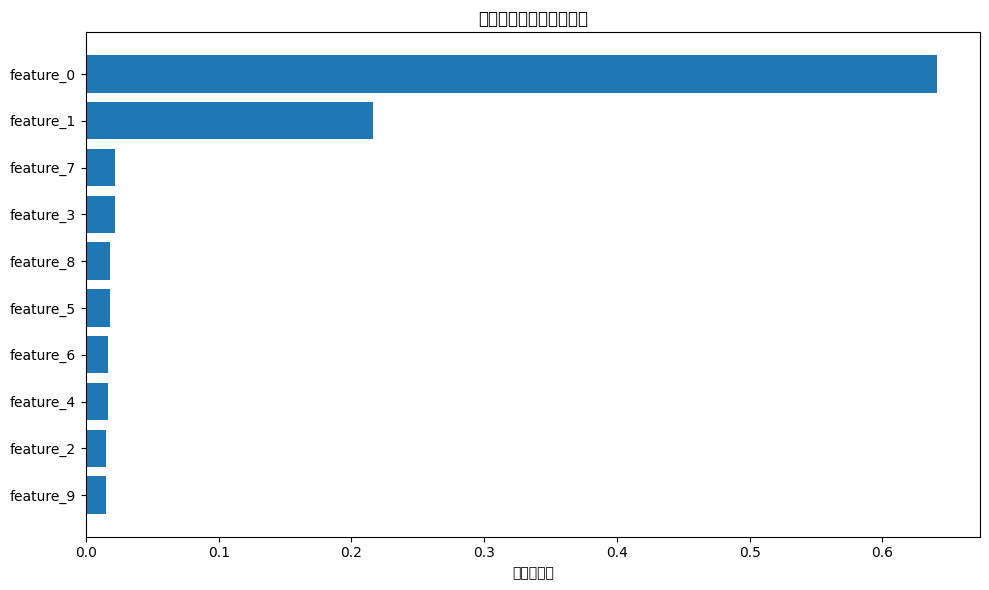

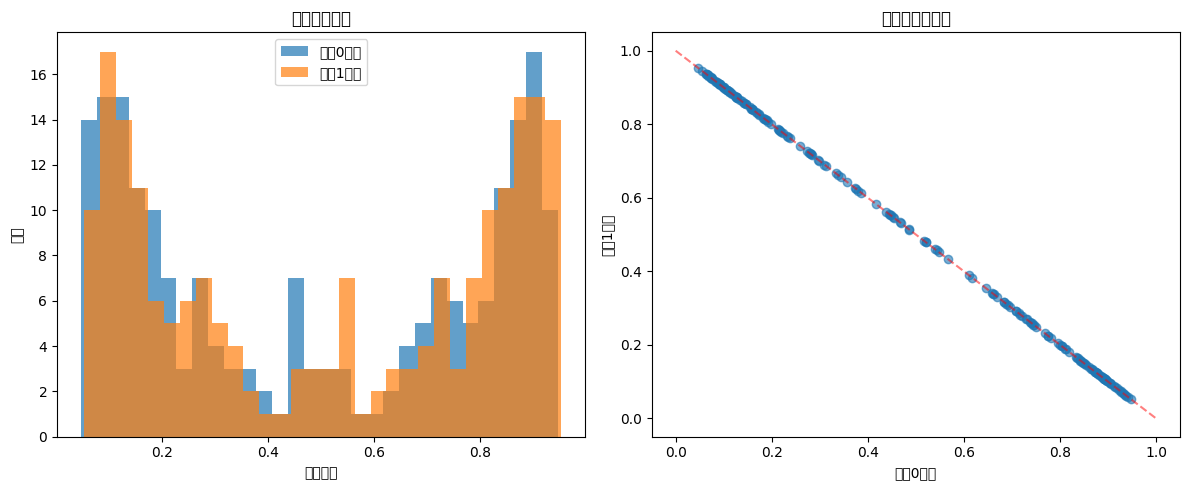

✅ 模型分析完成


In [ ]:
# 特征重要性分析和可视化
print("=== 特征重要性分析 ===")
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("特征重要性排序:")
print(feature_importance)

# 绘制特征重要性图
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('特征重要性')
plt.title('随机森林模型特征重要性')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 绘制预测概率分布
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_pred_proba[:, 0], bins=30, alpha=0.7, label='类别0概率')
plt.hist(y_pred_proba[:, 1], bins=30, alpha=0.7, label='类别1概率')
plt.xlabel('预测概率')
plt.ylabel('频数')
plt.title('预测概率分布')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_pred_proba[:, 0], y_pred_proba[:, 1], alpha=0.6)
plt.xlabel('类别0概率')
plt.ylabel('类别1概率')
plt.title('预测概率散点图')
plt.plot([0, 1], [1, 0], 'r--', alpha=0.5)

plt.tight_layout()
plt.show()

print("✅ 模型分析完成")
